# prepare a model on fraud data
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
fraud_data= pd.read_csv('C:/Users/home/Random Forest/Fraud_check (1).csv')
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data[fraud_data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [5]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
def risky_good(x):
    status=[]
    for i in x:
        if i<=30000:
            status.append('risky')
        elif i >30000:
            status.append('Good') 
    return status

In [8]:
fraud_status = pd.DataFrame(risky_good(fraud_data['Taxable.Income']),columns=['status'])

In [9]:
fraud_data['status']=fraud_status

In [10]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
fraud_data.rename(columns={'Marital.Status': 'Marital_Status'},inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()
fraud_data['Undergrad']= lebel.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital_Status']= lebel.fit_transform(fraud_data['Marital_Status'])
fraud_data['Urban']= lebel.fit_transform(fraud_data['Urban'])
fraud_data['status']= lebel.fit_transform(fraud_data['status'])
fraud_data.head()

,Undergrad,Marital_Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


2    217
1    194
0    189
Name: Marital_Status, dtype: int64

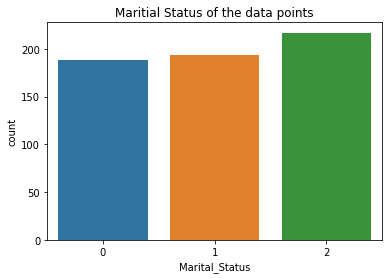

In [13]:
sns.countplot(fraud_data['Marital_Status'])
plt.title("Maritial Status of the data points")
fraud_data['Marital_Status'].value_counts()

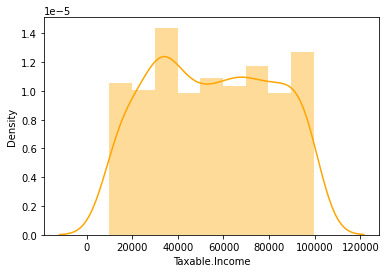

In [14]:
sns.distplot(fraud_data['Taxable.Income'],color='orange');

<AxesSubplot:xlabel='Work.Experience', ylabel='Count'>

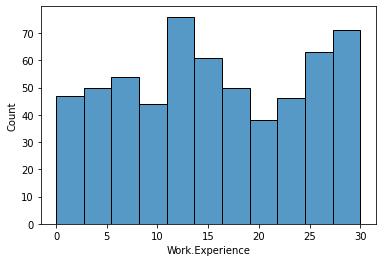

In [15]:
sns.histplot(fraud_data['Work.Experience'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

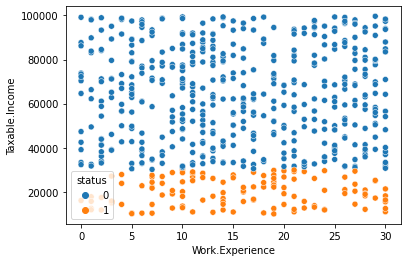

In [16]:
sns.scatterplot(y='Taxable.Income',x='Work.Experience',data=fraud_data,hue='status')

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

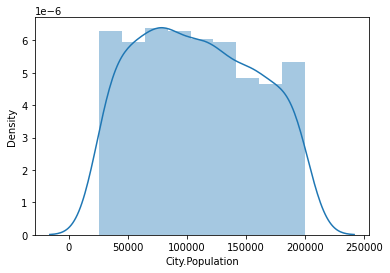

In [17]:
sns.distplot(fraud_data['City.Population'])

In [18]:
X=fraud_data.iloc[:,0:6]
Y=fraud_data['status']

In [19]:
X.drop('Marital_Status',axis=1,inplace=True)

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.22,random_state=42)

In [21]:
num_trees = 100
max_features = 3
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_rf.fit(X_train,Y_train)

RandomForestClassifier(max_features=3)

In [22]:
pred=model_rf.predict(X_test)

In [23]:
kfold= KFold(n_splits=10)
cross_val_score(model_rf,X,Y,cv=kfold).mean()*100

99.83333333333334